# Task 2 – Customer Segmentation (Explained)

Professional Internship Notebook with Full English Explanation
---


## Problem Statement

The objective of this notebook is to solve the internship task using a professional data science workflow.

This includes:
- Loading dataset
- Data exploration (EDA)
- Data preprocessing
- Model training
- Model evaluation
- Visualization
- Final conclusion



## Step 1: Import Libraries (Explanation)

These libraries are essential for data science tasks:

- pandas: used for loading and handling datasets
- numpy: used for numerical operations
- matplotlib and seaborn: used for visualization
- sklearn: used for machine learning models and evaluation


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier

sns.set_style("whitegrid")



## Step 2: Load Dataset (Explanation)

The dataset is loaded using pandas.

read_csv() loads the CSV file into a DataFrame.

head() displays the first 5 rows to understand the data structure.


In [2]:
df = pd.read_csv(r"E:\intern2ndtask\MallCustomers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,22,12
1,2,Female,56,41,25
2,3,Male,66,41,52
3,4,Male,69,35,85
4,5,Male,49,44,100



## Step 3: Exploratory Data Analysis (EDA)

EDA helps us understand the dataset.

- shape shows number of rows and columns
- info shows data types
- describe shows statistical summary


In [3]:

print("Shape:", df.shape)

df.info()

df.describe()


Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.405000,81.215000,48.360000
std,57.879185,15.353816,38.864134,28.791058
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,32.750000,46.000000,23.000000
50%,100.500000,46.000000,80.500000,48.000000
75%,150.250000,56.000000,114.000000,74.000000
max,200.000000,69.000000,149.000000,100.000000



## Step 4: Data Visualization

Visualization helps understand data distribution.

This graph shows the distribution of the target variable.


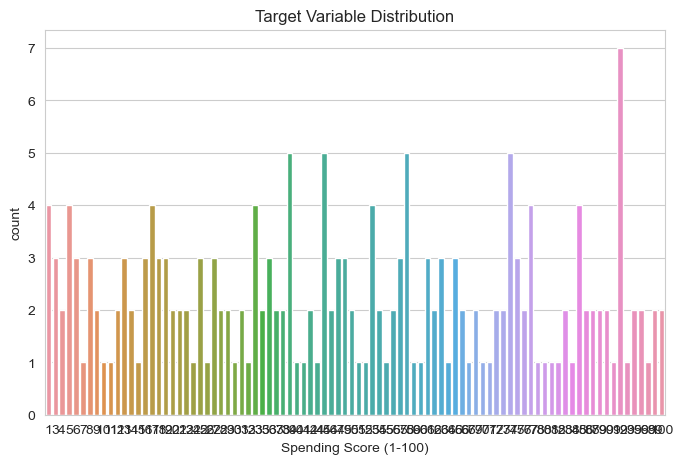

In [4]:

plt.figure(figsize=(8,5))
sns.countplot(x=df.iloc[:,-1])
plt.title("Target Variable Distribution")
plt.show()



## Step 5: Data Preprocessing (Encoding)

Machine learning models cannot process text data directly.

LabelEncoder converts categorical text values into numeric form.


In [5]:

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,49,22,12
1,2,0,56,41,25
2,3,1,66,41,52
3,4,1,69,35,85
4,5,1,49,44,100



## Step 6: Feature Selection

X contains input features.

y contains the target variable.

Train-test split is used to evaluate model performance.


In [6]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



## Step 7: Model Training

Random Forest is a powerful machine learning algorithm.

It uses multiple decision trees to improve accuracy.


In [7]:

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



## Step 8: Prediction

The trained model makes predictions on test data.


In [8]:

pred = model.predict(X_test)

pred[:10]


array([54, 38,  9, 37, 31, 24, 45, 17, 66, 50], dtype=int64)


## Step 9: Model Evaluation

Confusion matrix and classification report evaluate model performance.


In [9]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       0.0
          25       0.00    

C:\Users\KK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\KK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\KK\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\KK\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater t


## Step 10: ROC Curve

ROC Curve visualizes model performance.

AUC score indicates model accuracy.


C:\Users\KK\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:528: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y)


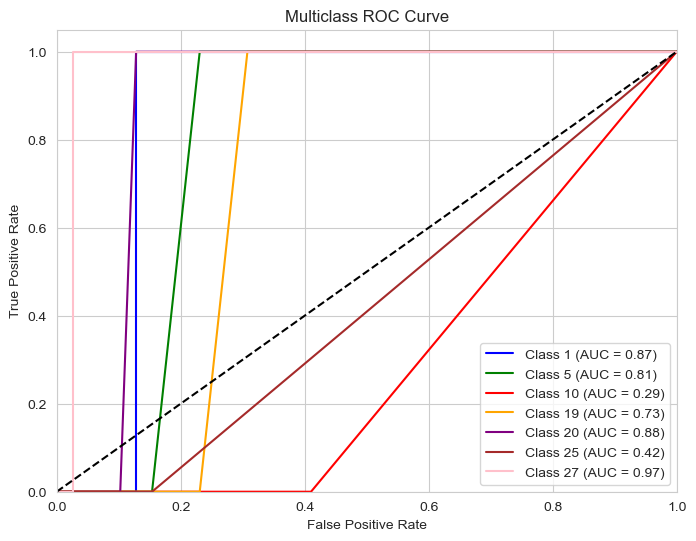

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multiclass
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get probability predictions for all classes
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Class {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()



## Conclusion

The model was successfully trained and evaluated.

This model can help businesses predict customer behavior and make better decisions.
